# Dados e Aprendizagem Automática
### Part IV

## **Logistic Regression using Titanic Dataset**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

*Load the CSV - Titanic train*

In [8]:
train = pd.read_csv("advertising.csv")

In [9]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Missing Data**

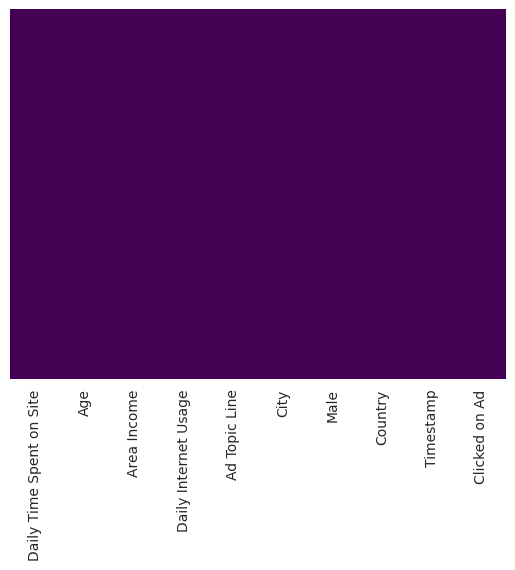

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

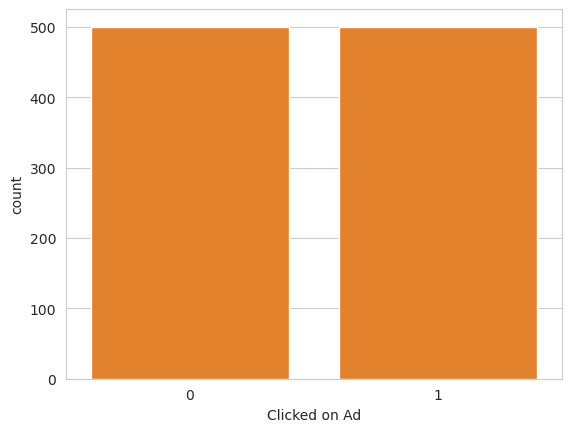

In [12]:
sns.set_style('whitegrid')
sns.countplot(x="Clicked on Ad", data=train)
plt.show()

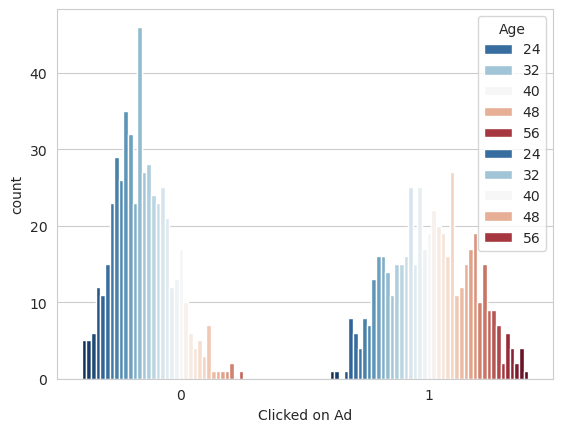

In [14]:
sns.set_style('whitegrid')
sns.countplot(x="Clicked on Ad",hue="Age",data=train,palette="RdBu_r")
plt.show()

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


**Logistic Regression Model**

In [31]:
train.drop(['Timestamp','Country','City','Ad Topic Line'],axis=1,inplace=True)
train.info()

from sklearn.model_selection import train_test_split
X = train.drop('Clicked on Ad',axis=1)
y = train["Clicked on Ad"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [32]:
X_train, X_test, y_train, y_test = train_test_split( X,y,
                                                    test_size=0.30, 
                                                    random_state=101)

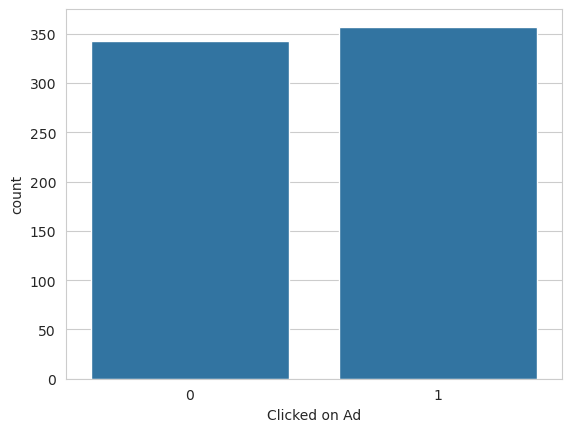

In [33]:
sns.set_style('whitegrid')
sns.countplot(x="Clicked on Ad", data = pd.DataFrame(y_train,columns=['Clicked on Ad']) )
plt.show()

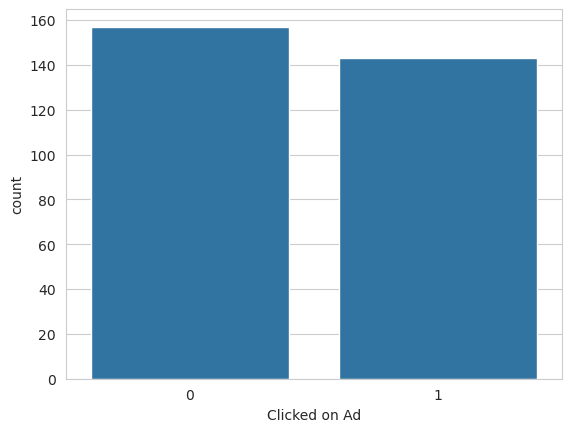

In [34]:
sns.set_style('whitegrid')
sns.countplot(x="Clicked on Ad", data = pd.DataFrame(y_test,columns=['Clicked on Ad']) )
plt.show()

<code>sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)</code>

LogisticRegression' **solvers**:

- Small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
- Multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss
- ‘liblinear’ is limited to one-versus-rest schemes.

Supported **penalties** by solver:

- ‘newton-cg’ - [‘l2’, ‘none’]

- ‘lbfgs’ - [‘l2’, ‘none’]

- ‘liblinear’ - [‘l1’, ‘l2’]

- ‘sag’ - [‘l2’, ‘none’]

- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

In [35]:
from sklearn.linear_model import LogisticRegression

**logmodel1 - LogisticRegression(random_state=2022, solver='newton-cg')**

In [36]:
starttime = time.process_time()

logmodel1 = LogisticRegression(random_state=2022, solver="newton-cg")
print(logmodel1)
logmodel1.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022, solver='newton-cg')
Time spent: 0.06602029999999992 seconds


/home/eduardoascunha/miniconda3/envs/envNAME/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/eduardoascunha/miniconda3/envs/envNAME/lib/python3.12/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


In [37]:
predictions1 = logmodel1.predict(X_test)

**logmodel2 - LogisticRegression(random_state=2022, solver='lbfgs')**

In [38]:
starttime = time.process_time()

logmodel2 = LogisticRegression(random_state=2022, solver="lbfgs",max_iter=800)
print(logmodel2)
logmodel2.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(max_iter=800, random_state=2022)
Time spent: 0.017250100000000046 seconds


In [39]:
predictions2 = logmodel2.predict(X_test)

**logmodel3 - LogisticRegression(random_state=2022, solver='liblinear')**

In [40]:
starttime = time.process_time()

logmodel3 = LogisticRegression(random_state=2022, solver="liblinear")
print(logmodel3)
logmodel3.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022, solver='liblinear')
Time spent: 0.0062813999999997705 seconds


In [41]:
predictions3 = logmodel3.predict(X_test)

**Evaluation**

In [42]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [43]:
print("With 'newton-cg': \n", classification_report(y_test,predictions1))
print("With 'lbfgs': \n", classification_report(y_test,predictions2))
print("With 'liblinear': \n", classification_report(y_test,predictions3))

With 'newton-cg': 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

With 'lbfgs': 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

With 'liblinear': 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg      

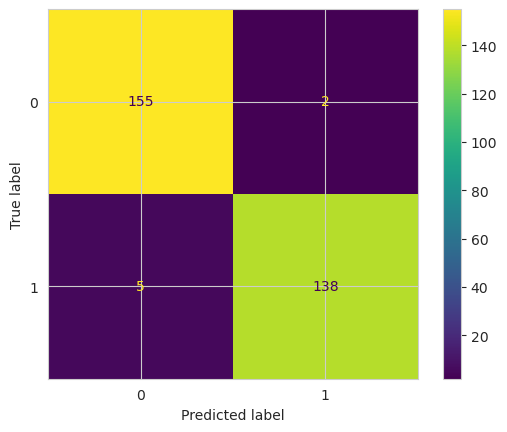

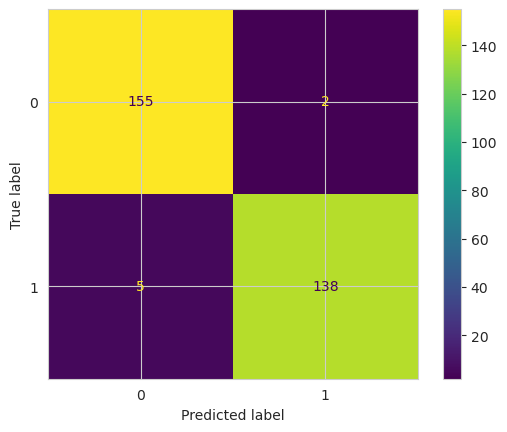

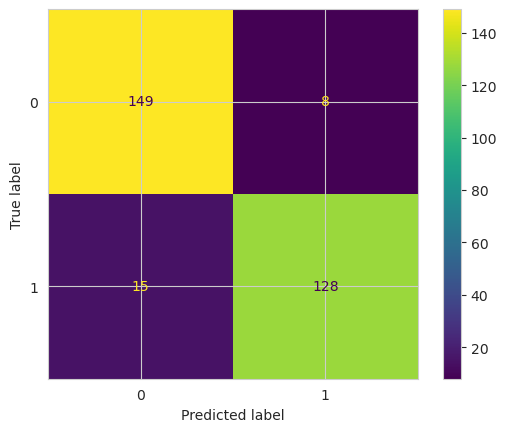

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,predictions1)
ConfusionMatrixDisplay.from_predictions(y_test,predictions2)
ConfusionMatrixDisplay.from_predictions(y_test,predictions3)
plt.show()